# Unit 5 - Financial Planning


In [92]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [93]:
## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [94]:
# Set current amount of crypto assets


my_btc = 1.2
my_eth = 5.3

# YOUR CODE HERE!

In [95]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [96]:
# Fetch current BTC price
# YOUR CODE HERE!
data_btc = requests.get(btc_url).json()
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
# Fetch current ETH price
# YOUR CODE HERE!]
data_eth = requests.get(eth_url).json()
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49186.80
The current value of your 5.3 ETH is $16983.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [97]:
# Current amount of shares
my_agg = 200
my_spy = 50
# YOUR CODE HERE!

In [98]:
# Set Alpaca API key and secret

# YOUR CODE HERE!
alpaca_api_key = os.environ['APCA_API_KEY_ID']='PKVWAE6RVF26ATLQTSN0'
alpaca_secret_key = os.environ['APCA_API_SECRET_KEY']='20YWIp6qC943mzUtPzStYcc2IDuZiJGSq0Tecy7D'
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

# YOUR CODE HERE!

In [99]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()


AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [100]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [101]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17362.50
The current value of your 200 AGG shares is $23576.00


### Savings Health Analysis

In [102]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,66170.067
shares,40938.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

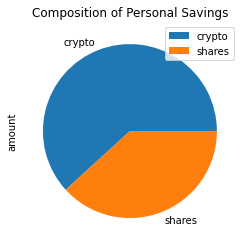

In [103]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")


In [104]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value

# Validate saving health
# YOUR CODE HERE!
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [53]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                           SPY            \
              open      high       low   close    volume    open      high   
2020-03-18  109.36  110.5700  105.7707  106.33  30173684  236.25  248.3700   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320  239.25  247.3800   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412  242.53  244.4700   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510  228.19  229.6833   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498  234.42  244.1000   

                                       
               low   close     volume  
2020-03-18  228.02  241.01  256921808  
2020-03-19  232.22  241.18  248430643  
2020-03-20  228.50  228.94  286308782  
2020-03-23  218.26  222.51  268298876  
2020-03-24  233.80  243.59  203576470

In [54]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)


In [55]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()


AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30173684          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  256921808          NaN  
2020-03-19  247.3800  232.22  241.18  248430643     0.000705  
2020-03-20  244.4700  228.50  228.94  286308782    -0.050750  
2020-03-23  229.6833  218.26  222.51  268298876    -0.028086  
2020-03-24  244.1000  233.80  243.59  203576470     0.094737

In [56]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.905493e-01,9.912780e-01,9.973375e-01,1.006003e+00,1.009538e+00,1.000724e+00,1.017956e+00,1.010438e+00,1.001277e+00,1.016944e+00,...,9.939716e-01,1.007124e+00,9.975987e-01,1.008856e+00,1.002600e+00,1.014884e+00,9.933702e-01,1.013358e+00,9.981374e-01,9.878054e-01
2,1.006563e+00,1.005188e+00,1.003715e+00,1.007416e+00,1.029954e+00,1.012860e+00,1.000844e+00,1.024473e+00,1.005547e+00,1.010234e+00,...,9.861433e-01,1.000526e+00,1.014815e+00,1.008116e+00,9.955507e-01,1.033476e+00,1.003743e+00,1.016242e+00,9.942482e-01,9.883921e-01
3,9.991465e-01,1.000582e+00,9.853975e-01,1.031976e+00,1.011638e+00,1.038754e+00,1.013012e+00,1.034069e+00,1.020741e+00,1.021947e+00,...,9.894125e-01,9.936980e-01,1.035251e+00,1.019312e+00,9.891056e-01,1.030775e+00,9.883052e-01,1.005643e+00,9.909587e-01,9.939144e-01
4,9.783011e-01,1.009576e+00,9.925560e-01,1.046398e+00,9.990612e-01,1.042703e+00,1.015384e+00,1.047436e+00,1.015849e+00,1.006697e+00,...,9.789945e-01,9.874810e-01,1.039619e+00,1.029475e+00,9.952407e-01,1.023342e+00,9.795198e-01,1.005397e+00,1.004971e+00,9.841050e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.886801e+08,5.031653e+07,2.575092e+07,2.269808e+08,5.961715e+08,5.879393e+07,1.955656e+07,1.855352e+08,1.824545e+08,4.796666e+07,...,4.333710e+07,2.117692e+08,1.608672e+09,2.437582e+08,1.087047e+08,1.867499e+08,1.404666e+08,9.426934e+07,8.122366e+08,2.856490e+07
7557,3.995870e+08,5.078387e+07,2.574260e+07,2.276892e+08,5.939188e+08,5.956531e+07,1.934815e+07,1.861867e+08,1.872265e+08,4.789545e+07,...,4.229803e+07,2.116644e+08,1.591948e+09,2.391545e+08,1.076981e+08,1.880679e+08,1.392363e+08,9.352285e+07,8.118127e+08,2.858461e+07
7558,4.032545e+08,5.023442e+07,2.565024e+07,2.247982e+08,5.931822e+08,5.914924e+07,1.906712e+07,1.885339e+08,1.870369e+08,4.805596e+07,...,4.276927e+07,2.127353e+08,1.605402e+09,2.382128e+08,1.076147e+08,1.867078e+08,1.413569e+08,9.440863e+07,7.878594e+08,2.952298e+07
7559,4.110955e+08,5.027374e+07,2.521376e+07,2.270384e+08,6.016094e+08,5.782419e+07,1.926608e+07,1.888577e+08,1.870929e+08,4.696116e+07,...,4.333197e+07,2.131551e+08,1.597226e+09,2.362248e+08,1.070553e+08,1.862412e+08,1.441694e+08,9.698468e+07,7.865004e+08,2.958595e+07


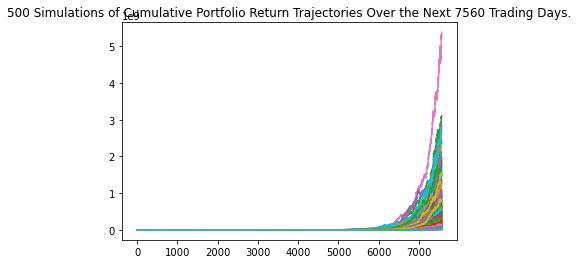

In [68]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()


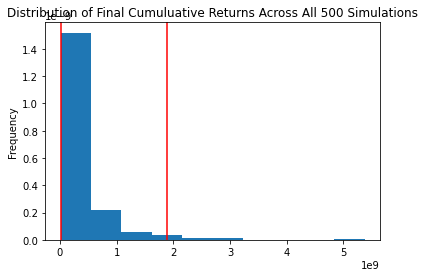

In [69]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()


### Retirement Analysis

In [70]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)


count           5.000000e+02
mean            3.659925e+08
std             5.252492e+08
min             8.077230e+06
25%             9.044549e+07
50%             1.889406e+08
75%             4.070383e+08
max             5.380967e+09
95% CI Lower    2.483648e+07
95% CI Upper    1.886242e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [71]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $496729683568.93 and $37724840868833.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [72]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $496729683568.93 and $37724840868833.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [73]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()
# YOUR CODE HERE!

AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30173684          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  256921808          NaN  
2020-03-19  247.3800  232.22  241.18  248430643     0.000705  
2020-03-20  244.4700  228.50  228.94  286308782    -0.050750  
2020-03-23  229.6833  218.26  222.51  268298876    -0.028086  
2020-03-24  244.1000  233.80  243.59  203576470     0.094737

In [74]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000039,0.983636,1.004521,1.013279,1.002611,1.011746,1.013578,0.995159,1.005411,1.008611,...,1.000185,0.994384,1.003192,0.999517,0.999918,1.028605,0.995538,0.987605,1.004974,1.007052
2,1.033387,0.971554,0.981347,0.994183,1.011563,1.004464,1.038108,1.012533,1.012005,1.004998,...,0.988229,1.022439,1.004834,1.016450,1.000251,1.052383,0.979767,1.006265,1.011030,1.002977
3,1.054196,0.972525,0.980915,0.997510,1.025330,0.980173,1.022900,1.002546,1.020167,1.009751,...,0.995867,1.013705,1.003969,1.023644,1.004877,1.041057,0.980653,1.018365,1.024856,0.995861
4,1.060221,0.969578,0.999228,0.984387,1.026351,0.982721,1.016620,1.014388,1.009760,1.009073,...,0.981169,1.009620,0.984589,1.023540,1.005563,1.048105,0.984888,1.033789,1.048145,1.032058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,21.013925,33.935432,30.541608,18.952692,35.610442,41.765888,34.826696,18.264357,11.502305,10.270987,...,32.906238,21.214077,20.225608,28.924937,28.094367,24.662964,32.940197,29.627540,38.782816,23.363080
1257,21.154394,33.837038,30.582065,19.508504,35.690380,41.250644,34.663222,18.489481,11.430615,10.187101,...,33.475504,21.555862,19.999555,28.525422,27.375078,24.873501,33.512273,29.141577,39.099474,23.573386
1258,21.344548,34.119106,30.426941,19.726015,36.196419,41.611061,34.897039,18.536326,11.419162,10.326046,...,34.222510,21.624095,20.114018,28.672754,27.625040,25.324491,33.717738,29.463289,38.833233,23.670597
1259,21.401472,34.480197,30.520865,19.708805,36.358263,40.266247,34.552280,18.067741,11.490077,10.296844,...,34.126607,21.657498,20.043169,29.081722,27.284526,25.197226,34.482752,29.877302,38.805915,23.657028


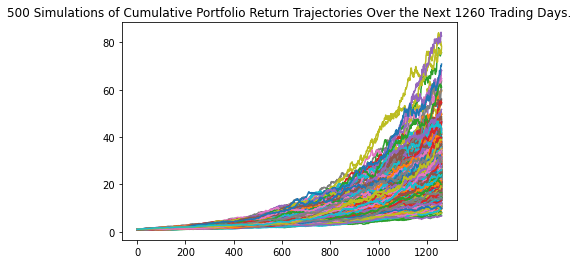

In [75]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_even_dist_five.plot_simulation()


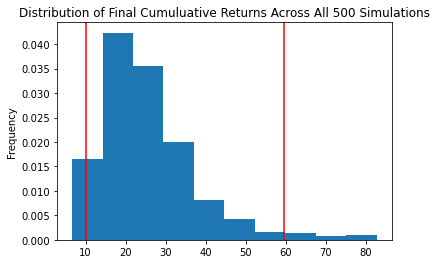

In [76]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()


In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)


count           500.000000
mean             25.601536
std              11.981238
min               6.616950
25%              17.341393
50%              23.510140
75%              30.650927
max              82.652691
95% CI Lower     10.109703
95% CI Upper     59.547458
Name: 1260, dtype: float64


In [78]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $606582.2 and $3572847.5


### Ten Years Retirement Option

In [79]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30173684          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  256921808          NaN  
2020-03-19  247.3800  232.22  241.18  248430643     0.000705  
2020-03-20  244.4700  228.50  228.94  286308782    -0.050750  
2020-03-23  229.6833  218.26  222.51  268298876    -0.028086  
2020-03-24  244.1000  233.80  243.59  203576470     0.094737

In [80]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_ten.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011572,1.025067,0.997899,0.998887,0.995558,0.984755,1.010630,0.994620,1.030831,1.002937,...,0.974765,1.017835,0.991970,1.008841,1.001946,1.007157,1.001335,1.005051,1.009176,1.001658
2,1.025792,1.018296,0.987526,1.001457,1.009523,0.976251,0.990422,1.011844,1.015628,1.010405,...,0.960228,1.011173,1.012348,1.025245,1.002489,1.025763,0.990417,1.009167,1.034400,0.989348
3,1.038944,1.019876,0.999442,0.997193,1.004035,0.938487,0.998296,1.031729,1.022319,1.027810,...,0.961446,1.027570,1.005312,1.020644,1.005140,1.022524,1.007509,1.024558,1.050397,0.989721
4,1.031912,1.018605,1.002683,0.985805,0.986480,0.935445,1.003670,1.028277,1.042995,1.040351,...,0.977313,1.025469,0.996665,1.014435,1.015707,1.003276,0.994356,1.032044,1.078870,0.981537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,510.278749,2027.904536,372.317032,667.492158,150.965476,376.941004,475.493141,336.062832,583.970238,468.562206,...,433.896514,1015.006458,302.720664,506.773733,1101.525099,946.173308,1669.825311,406.819157,220.497541,339.466438
2517,507.865327,2054.467561,377.028598,671.482265,155.326481,379.458133,483.852403,334.719604,583.598363,463.117342,...,437.671738,1021.492649,304.937868,516.993782,1107.039828,938.950159,1652.475523,410.961243,221.571750,343.078044
2518,509.122179,2067.317688,385.927933,664.511015,156.867402,376.761717,478.436748,327.696686,597.267463,466.865891,...,433.785653,1019.769475,311.073997,533.058337,1106.249957,945.816052,1634.399634,412.714906,220.251187,358.535876
2519,506.322880,2060.232480,388.781034,672.116884,157.659704,375.209352,485.137878,322.821460,594.282375,469.976047,...,432.714252,1020.968224,313.282473,537.325317,1105.489697,955.238410,1653.609941,420.270490,218.398966,363.155137


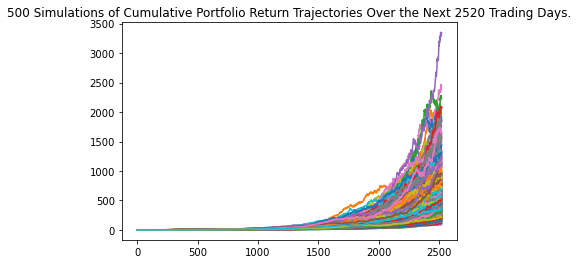

In [81]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()


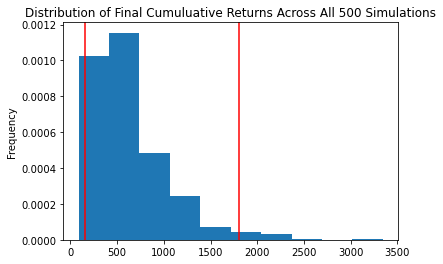

In [82]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_even_dist_ten.plot_distribution()


In [83]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)


count            500.000000
mean             632.087657
std              408.970148
min               87.004861
25%              354.882037
50%              534.920607
75%              783.439435
max             3344.160281
95% CI Lower     158.978381
95% CI Upper    1801.236295
Name: 2520, dtype: float64


In [84]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $9538702.84 and $108074177.73
